In [1]:
"""
Yu Darvish analytics(2013 VS 2016)
トミー・ジョン手術前のベストシーズン(2013)とトミー・ジョン手術後のシーズン(2016/8/31まで)を比較
"""

%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300

In [2]:
# 元データを取得

pitch2013 = pd.read_csv('./output/player_stats/yu_darvish_2013_pitch.csv')
pitch2016 = pd.read_csv('./output/player_stats/yu_darvish_2016_pitch.csv')

In [3]:
#  行数をカウント. 行数=シーズン中に投げた投球数(になるようにデータセット作ってます)
print('Yu Darvish 2013 pitch:{}'.format(len(pitch2013)))

Yu Darvish 2013 pitch:3451


In [4]:
print('Yu Darvish 2016 pitch:{}'.format(len(pitch2016)))

Yu Darvish 2016 pitch:1122


In [5]:
# 次に、全投球の球種を円グラフ(パーセンテージ)にしてみる.
# 2016年からはストレート系(FF,FT,FC)が増えてるらしいが本当?
"""
球種の略称と正式名
    'CH': 'Change-up',
    'CU': 'Curveball',
    'EP': 'Ephuus',
    'FA': 'Fastball',
    'FC': 'Cut Fastball',
    'FF': 'four-seam Fastball',
    'FO': 'Forkball',
    'FS': 'Split-finger Fastball',
    'FT': 'two-seam Fastball',
    'KC': 'Knuckle Curve',
    'KN': 'Knuckleball',
    'SC': 'Screwball',
    'SI': 'Sinker',
    'SL': 'Slider',
    'UN': 'Unknown'

"""
pitch_type_2013 = pitch2013.pitch_type.groupby(pitch2013.pitch_type).count()
pitch_type_2016 = pitch2016.pitch_type.groupby(pitch2016.pitch_type).count()


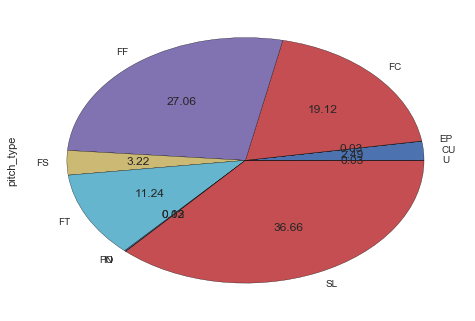

In [6]:
# グラフ出すよ! 2013
pitch_type_2013.plot.pie(autopct='%.2f')

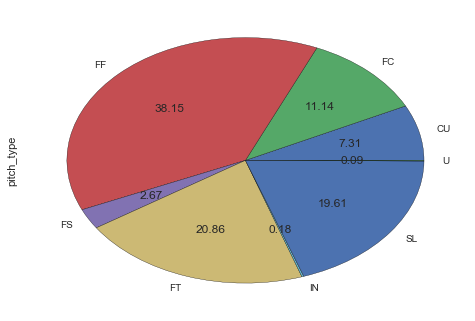

In [7]:
# グラフ出すよ! 2016
pitch_type_2016.plot.pie(autopct='%.2f')

In [8]:
"""
おお、確かにストレート系が大半を占めている...

しかしこれってキャッチャーのリードが関係あるのでは?
キャッチャー毎の傾向...はデータが無いのでちょっと見れない、残念orz

投球内容の変化(速度など)があったかちょっと見てみる

"""
# 初速/終速/回転数の各種統計(2013)
pitch2013[['start_speed', 'end_speed', 'spin_rate']].describe()

/usr/local/var/pyenv/versions/3.5.2/envs/py3.5.2_pitchpx-example-ichiro-2016/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,start_speed,end_speed,spin_rate
count,3450.000000,3450.000000,3450.000000
mean,86.871507,80.665304,1839.389920
std,6.663658,6.166043,493.457895
min,52.300000,49.900000,131.503000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,98.200000,91.600000,3791.897000


In [9]:
# 初速/終速/回転数の各種統計(2016)
pitch2016[['start_speed', 'end_speed', 'spin_rate']].describe()

/usr/local/var/pyenv/versions/3.5.2/envs/py3.5.2_pitchpx-example-ichiro-2016/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,start_speed,end_speed,spin_rate
count,1121.000000,1121.000000,1121.000000
mean,88.393756,82.336664,1875.690695
std,7.355215,6.805339,469.276425
min,59.600000,55.200000,243.444000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,98.100000,91.700000,3450.934000


In [10]:
# うーん...決定的な差がない、FF(four-seam Fastball)だけに絞ってみてみる
pitch2013_ff = pitch2013.query('pitch_type=="FF"')
pitch2016_ff = pitch2016.query('pitch_type=="FF"')

In [11]:
# もう一度統計
pitch2013_ff[['start_speed', 'end_speed', 'spin_rate']].describe()

,start_speed,end_speed,spin_rate
count,934.000000,934.000000,934.000000
mean,93.146360,86.153961,2249.863140
std,1.863902,1.861807,338.210374
min,87.800000,79.900000,131.503000
25%,91.800000,84.800000,2054.341000
50%,93.200000,86.200000,2256.855500
75%,94.500000,87.500000,2436.730500
max,98.200000,91.600000,3400.957000


In [12]:
pitch2016_ff[['start_speed', 'end_speed', 'spin_rate']].describe()

,start_speed,end_speed,spin_rate
count,428.000000,428.000000,428.000000
mean,93.550467,86.885047,2192.016456
std,2.043422,1.925902,353.294113
min,87.100000,80.600000,940.495000
25%,92.300000,85.600000,2042.326750
50%,93.700000,87.000000,2242.674500
75%,95.000000,88.300000,2419.501250
max,98.100000,91.300000,2923.948000


In [13]:
# あれ、むしろ悪化してる?じゃあ投球の確率が倍になったFT(two-seam Fastbal)でみてみよう

In [14]:
# うーん...決定的な差がない、FF(four-seam Fastball)だけに絞ってみてみる
pitch2013_ft = pitch2013.query('pitch_type=="FT"')
pitch2016_ft = pitch2016.query('pitch_type=="FT"')

In [15]:
# もう一度統計
pitch2013_ft[['start_speed', 'end_speed', 'spin_rate']].describe()

,start_speed,end_speed,spin_rate
count,388.000000,388.000000,388.000000
mean,92.266237,85.644588,2027.694098
std,1.933165,1.895540,484.039544
min,87.900000,80.700000,305.082000
25%,90.900000,84.300000,1750.298750
50%,92.100000,85.600000,2087.199000
75%,93.500000,87.000000,2361.609000
max,97.400000,90.700000,3791.897000


In [16]:
pitch2016_ft[['start_speed', 'end_speed', 'spin_rate']].describe()

,start_speed,end_speed,spin_rate
count,234.000000,234.000000,234.000000
mean,92.486752,86.178205,1893.383137
std,2.055631,1.899016,334.986369
min,88.300000,82.200000,931.075000
25%,91.025000,85.000000,1701.061250
50%,92.300000,86.100000,1923.431000
75%,93.900000,87.400000,2111.368250
max,97.900000,91.700000,3450.934000


In [17]:
# (誤差の範囲ですが)ツーシームの球質は良くなってそう
# ここで視点を変えてストライクゾーンに入った投球を対象に見てみる
pitch2013_strike = pitch2013.query('pitch_res=="S" or (pitch_res=="X" and pa_event_cd in [2, 3])')

In [18]:
pitch2016_strike = pitch2016.query('pitch_res=="S" or (pitch_res=="X" and pa_event_cd in [2, 3])')

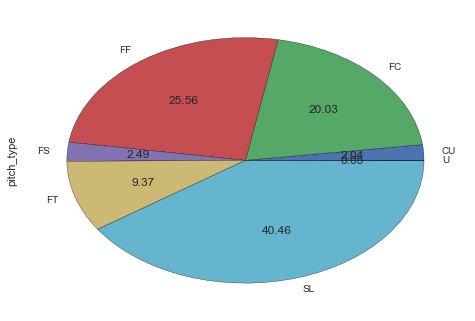

In [19]:
# グラフ化する(2013)
pitch2013_strike_pitch_type = pitch2013_strike.pitch_type.groupby(pitch2013_strike.pitch_type).count()
pitch2013_strike_pitch_type.plot.pie(autopct='%.2f')

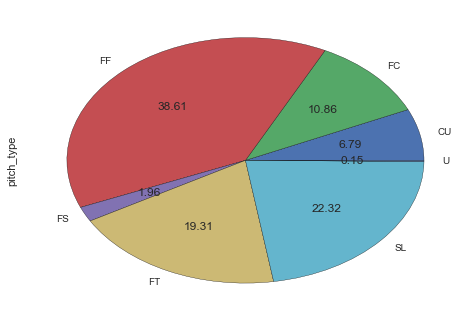

In [20]:
# グラフ化する(2016)
pitch2016_strike_pitch_type = pitch2016_strike.pitch_type.groupby(pitch2016_strike.pitch_type).count()
pitch2016_strike_pitch_type.plot.pie(autopct='%.2f')

In [21]:
# 明らかに真っ直ぐでストライクを稼いでる...
# ではここで(意地悪だが)ヒットにされたボールの球種を分類
pitch2013_hits = pitch2013.query('pitch_res=="X" and pa_event_cd in [20, 21, 22, 23]')
pitch2016_hits = pitch2016.query('pitch_res=="X" and pa_event_cd in [20, 21, 22, 23]')

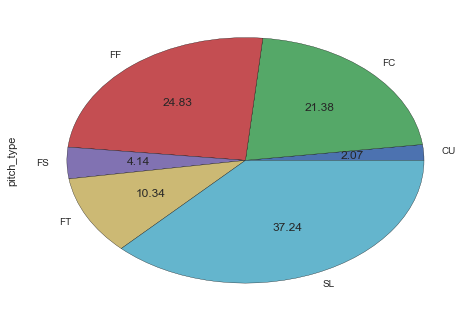

In [22]:
# グラフ化する(2013)
pitch2013_hits_pitch_type = pitch2013_hits.pitch_type.groupby(pitch2013_hits.pitch_type).count()
pitch2013_hits_pitch_type.plot.pie(autopct='%.2f')

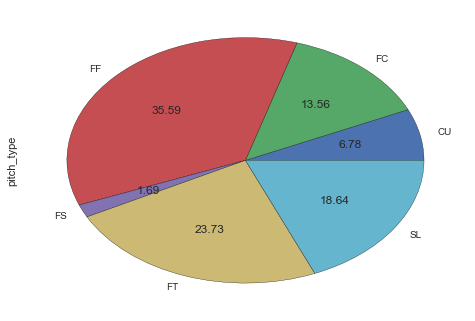

In [23]:
# グラフ化する(2016)
pitch2016_hits_pitch_type = pitch2016_hits.pitch_type.groupby(pitch2016_hits.pitch_type).count()
pitch2016_hits_pitch_type.plot.pie(autopct='%.2f')

In [24]:
# 投球比率が高い球はストライクもヒットも両方確率高いというつまらない結果が
# さらに視点を変えて、ホームランを打たれた投球のみに着目
pitch2013_hr = pitch2013.query('pitch_res=="X" and pa_event_cd in [23]')
pitch2016_hr = pitch2016.query('pitch_res=="X" and pa_event_cd in [23]')


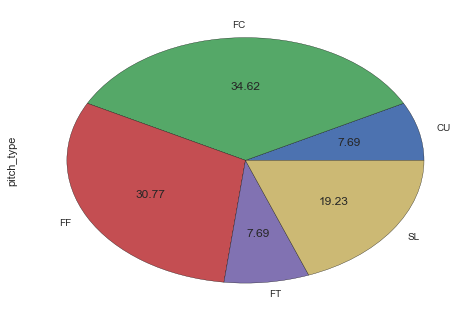

In [25]:
# グラフ化する(2013)
pitch2013_hr_pitch_type = pitch2013_hr.pitch_type.groupby(pitch2013_hr.pitch_type).count()
pitch2013_hr_pitch_type.plot.pie(autopct='%.2f')

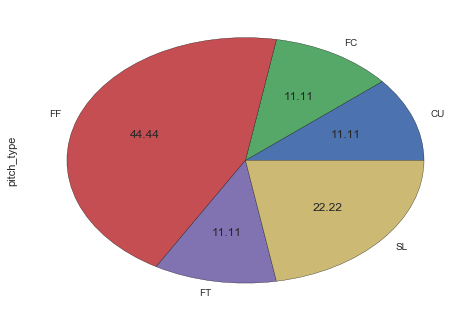

In [26]:
# グラフ化する(2016)
pitch2016_hr_pitch_type = pitch2016_hr.pitch_type.groupby(pitch2016_hr.pitch_type).count()
pitch2016_hr_pitch_type.plot.pie(autopct='%.2f')

In [27]:
pitch2013_hr_pitch_type

pitch_type
CU    2
FC    9
FF    8
FT    2
SL    5
Name: pitch_type, dtype: int64

In [28]:
pitch2016_hr_pitch_type

pitch_type
CU    1
FC    1
FF    4
FT    1
SL    2
Name: pitch_type, dtype: int64

In [29]:
# 2013年はカットボールで本塁打を打たれすぎてる?
# 2016年はカットボールの比率が落ちているので打たれていない?
# ちょっとイマイチなので、今度は球場別(テキサスとテキサス以外)でチェック
pitch2013_home = pitch2013.query('park_id==13')
pitch2016_home = pitch2016.query('park_id==13')

In [30]:
pitch2013_away = pitch2013.query('park_id!=13')
pitch2016_away = pitch2016.query('park_id!=13')

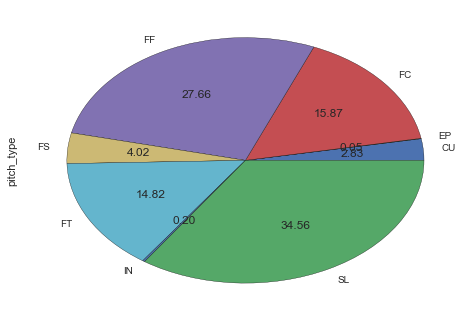

In [31]:
# グラフ化する(2013 home & away)
pitch2013_home_pitch_type = pitch2013_home.pitch_type.groupby(pitch2013_home.pitch_type).count()
pitch2013_home_pitch_type.plot.pie(autopct='%.2f')

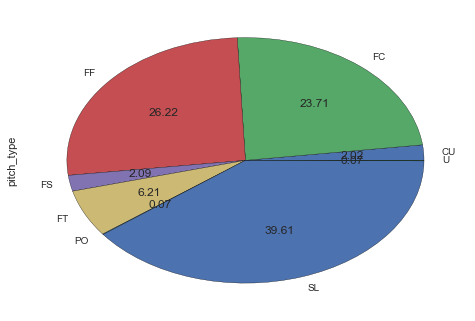

In [32]:
pitch2013_away_pitch_type = pitch2013_away.pitch_type.groupby(pitch2013_away.pitch_type).count()
pitch2013_away_pitch_type.plot.pie(autopct='%.2f')

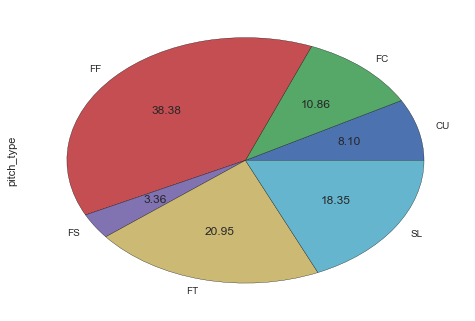

In [33]:
# グラフ化する(2016 home & away)
pitch2016_home_pitch_type = pitch2016_home.pitch_type.groupby(pitch2016_home.pitch_type).count()
pitch2016_home_pitch_type.plot.pie(autopct='%.2f')

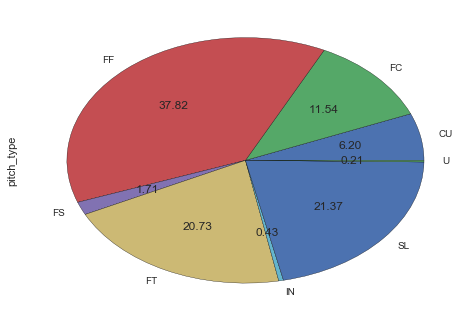

In [34]:
pitch2016_away_pitch_type = pitch2016_away.pitch_type.groupby(pitch2016_away.pitch_type).count()
pitch2016_away_pitch_type.plot.pie(autopct='%.2f')

In [35]:
# 2016年は変わらない、2013年はアウェイだと4/2シーム系が減ってカットボールとスライダーが増量という感じに

In [36]:
# 今度は定番「打者の左右」で投球の内容を見てみる、まずは2013年
pitch2013_bat_l = pitch2013.query('bat_hand_cd=="L"')
pitch2013_bat_r = pitch2013.query('bat_hand_cd=="R"')

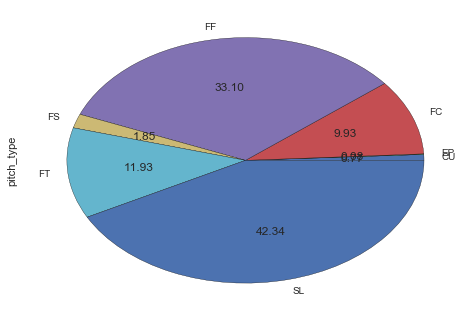

In [37]:
# まずは右
pitch2013_bat_r_pitch_type = pitch2013_bat_r.pitch_type.groupby(pitch2013_bat_r.pitch_type).count()
pitch2013_bat_r_pitch_type.plot.pie(autopct='%.2f')

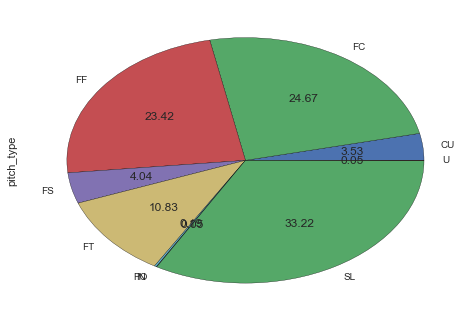

In [38]:
# では左
pitch2013_bat_l_pitch_type = pitch2013_bat_l.pitch_type.groupby(pitch2013_bat_l.pitch_type).count()
pitch2013_bat_l_pitch_type.plot.pie(autopct='%.2f')

In [39]:
# 対右打者はストレート系とスライダー、左打者はカットボールとスライダーが軸っぽい
# 2016年も見てみよう
pitch2016_bat_l = pitch2016.query('bat_hand_cd=="L"')
pitch2016_bat_r = pitch2016.query('bat_hand_cd=="R"')

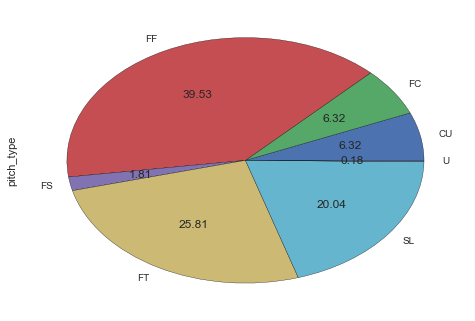

In [40]:
pitch2016_bat_r_pitch_type = pitch2016_bat_r.pitch_type.groupby(pitch2016_bat_r.pitch_type).count()
pitch2016_bat_r_pitch_type.plot.pie(autopct='%.2f')

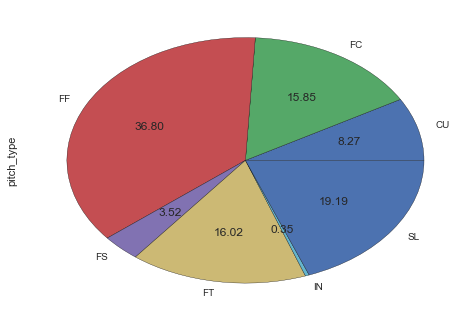

In [41]:
pitch2016_bat_l_pitch_type = pitch2016_bat_l.pitch_type.groupby(pitch2016_bat_l.pitch_type).count()
pitch2016_bat_l_pitch_type.plot.pie(autopct='%.2f')

In [42]:
# 対左打者でカットボールが有効な武器というのは変わってない、2013年以上に直球系を駆使しているっぽい

In [43]:
# Strike, Ball, In Play(Out or Hits)でドーナツグラフを球種毎に書く
from bokeh.charts import Donut
from bokeh.plotting import show
from bokeh.charts.utils import df_from_json

from bokeh.sampledata.olympics2014 import data
from bokeh.io import output_notebook


In [44]:
output_notebook()
# utilize utility to make it easy to get json/dict data converted to a dataframe
df = df_from_json(data)

# filter by countries with at least one medal and sort by total medals
df = df[df['total'] > 8]
df = df.sort("total", ascending=False)
df = pd.melt(df, id_vars=['abbr'],
             value_vars=['bronze', 'silver', 'gold'],
             value_name='medal_count', var_name='medal')

# original example
d = Donut(df, label=['abbr', 'medal'], values='medal_count',
          text_font_size='8pt', hover_text='medal_count')

show(d)

Loading BokehJS ...

/usr/local/var/pyenv/versions/3.5.2/envs/py3.5.2_pitchpx-example-ichiro-2016/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/var/pyenv/versions/3.5.2/envs/py3.5.2_pitchpx-example-ichiro-2016/lib/python3.5/site-packages/bokeh/io.py:350: UserWarning: 

BokehJS does not appear to have successfully loaded. If loading BokehJS from CDN, this
may be due to a slow or bad network connection. Possible fixes:

* ALWAYS run `output_notebook()` in a cell BY ITSELF, AT THE TOP, with no other code
* re-rerun `output_notebook()` to attempt to load from CDN again, or
* use INLINE resources instead, as so:

    from bokeh.resources import INLINE
    output_notebook(resources=INLINE)

  warnings.warn(_NB_LOAD_WARNING)


In [45]:
df = df_from_json(data)


In [46]:
df

,abbr,bronze,gold,silver,total,name
0,ALB,0,0,0,0,Albania
1,AND,0,0,0,0,Andorra
2,ARG,0,0,0,0,Argentina
3,ARM,0,0,0,0,Armenia
4,AUS,1,0,2,3,Australia
5,AUT,1,2,6,9,Austria
6,AZE,0,0,0,0,Azerbaijan
7,BLR,1,5,0,6,Belarus
8,BEL,0,0,0,0,Belgium
9,BMU,0,0,0,0,Bermuda


In [49]:
pitch2013_summary = pitch2013[['pitch_type', 'pitch_res']]

In [67]:
pitch2013_summary.pitch_type.groupby(pitch2013_summary.pitch_type).count()

AttributeError: 'Series' object has no attribute 'pitch_res'

In [56]:
pitch2013_summary

,pitch_type,pitch_res
0,FF,B
1,FF,B
2,FC,S
3,FC,S
4,SL,B
5,SL,S
6,FC,B
7,FC,S
8,FC,B
9,FC,S
